# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型

In [3]:
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    enable_segmentation=True,      # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 读入图像，输入模型，获取预测结果

In [4]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')
# img = cv2.imread('test.jpg')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
results

mediapipe.python.solution_base.SolutionOutputs

# 人体抠图结果

In [6]:
mask = results.segmentation_mask

In [7]:
mask.shape

(1001, 666)

In [8]:
img.shape

(1001, 666, 3)

In [9]:
mask

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.5593622e-12,
        3.8790316e-12, 4.1494972e-12],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.8378402e-12,
        4.1776396e-12, 4.4628671e-12],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.1735747e-12,
        4.3775521e-12, 4.7428502e-12],
       ...,
       [3.0415483e-12, 3.0148709e-12, 2.9788995e-12, ..., 3.9600214e-16,
        3.8151685e-16, 3.4859726e-16],
       [3.0483602e-12, 3.0126806e-12, 2.9860032e-12, ..., 4.9619534e-16,
        4.7152111e-16, 4.2470745e-16],
       [3.0542227e-12, 3.0190908e-12, 2.9932894e-12, ..., 6.0379870e-16,
        5.3006147e-16, 4.9149314e-16]], dtype=float32)

In [10]:
mask = mask > 0.5

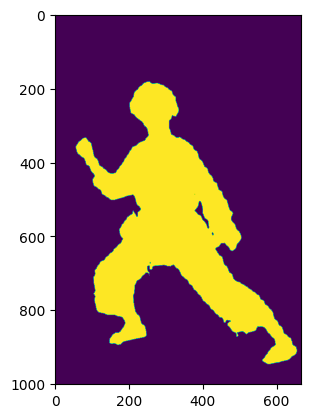

In [11]:
plt.imshow(mask)
plt.show()

In [12]:
import numpy as np

# 单通道转三通道
mask_3 = np.stack((mask,mask,mask), axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

# 获得前景人像
FG_img = np.where(mask_3, img, fg_image)

# 获得抠掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

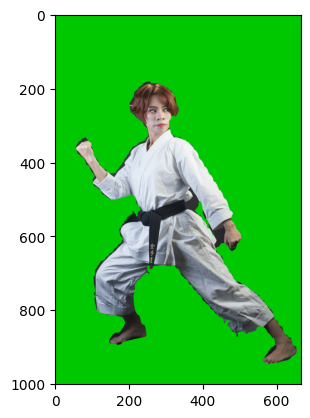

In [13]:
look_img(FG_img)

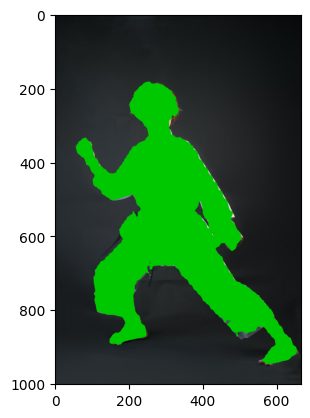

In [14]:
look_img(BG_img)

# 所有关键点检测结果

In [15]:
results.pose_landmarks

landmark {
  x: 0.42718684673309326
  y: 0.28176045417785645
  z: -0.7528588771820068
  visibility: 0.9999995231628418
}
landmark {
  x: 0.4375799000263214
  y: 0.2632758319377899
  z: -0.7155289649963379
  visibility: 0.9999992847442627
}
landmark {
  x: 0.45074430108070374
  y: 0.2619546353816986
  z: -0.7150575518608093
  visibility: 0.9999995231628418
}
landmark {
  x: 0.4602421820163727
  y: 0.26092544198036194
  z: -0.715082585811615
  visibility: 0.9999994039535522
}
landmark {
  x: 0.40475669503211975
  y: 0.2646046280860901
  z: -0.6986936926841736
  visibility: 0.9999984502792358
}
landmark {
  x: 0.39266151189804077
  y: 0.2649586498737335
  z: -0.698076605796814
  visibility: 0.9999961853027344
}
landmark {
  x: 0.3816121816635132
  y: 0.2658728063106537
  z: -0.6997948884963989
  visibility: 0.9999945163726807
}
landmark {
  x: 0.46672359108924866
  y: 0.26888349652290344
  z: -0.48993390798568726
  visibility: 0.9999959468841553
}
landmark {
  x: 0.36308610439300537
  y: 

In [16]:
mp_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [17]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.6157318949699402
y: 0.46861007809638977
z: -0.5283049941062927
visibility: 0.9973970651626587

In [18]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.6157318949699402
y: 0.46861007809638977
z: -0.5283049941062927
visibility: 0.9973970651626587

In [19]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13].x

0.6157318949699402

# 解析指定关键点的像素坐标

In [20]:
img.shape

(1001, 666, 3)

In [21]:
h = img.shape[0]
w = img.shape[1]

In [22]:
# 左胳膊肘关键点像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * w

410.07744204998016

In [23]:
# 左胳膊肘关键点像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * h

469.07868817448616

# 解析指定关键点的真实物理（米）坐标

In [24]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

x: -0.10773525387048721
y: -0.5413076877593994
z: -0.2769346833229065
visibility: 0.9999995231628418

In [25]:
results.pose_world_landmarks.landmark[23]

x: 0.07803427428007126
y: 0.011955736204981804
z: -0.03498343005776405
visibility: 0.9997432827949524

真实物理坐标的原点位于左右髋关节连线的中点（肚脐附近），详见论文。

# 交互式三维可视化

In [26]:
import numpy as np

In [27]:
coords = np.array(results.pose_landmarks.landmark)

In [28]:
coords

array([x: 0.42718684673309326
       y: 0.28176045417785645
       z: -0.7528588771820068
       visibility: 0.9999995231628418, x: 0.4375799000263214
                                       y: 0.2632758319377899
                                       z: -0.7155289649963379
                                       visibility: 0.9999992847442627,
       x: 0.45074430108070374
       y: 0.2619546353816986
       z: -0.7150575518608093
       visibility: 0.9999995231628418, x: 0.4602421820163727
                                       y: 0.26092544198036194
                                       z: -0.715082585811615
                                       visibility: 0.9999994039535522,
       x: 0.40475669503211975
       y: 0.2646046280860901
       z: -0.6986936926841736
       visibility: 0.9999984502792358, x: 0.39266151189804077
                                       y: 0.2649586498737335
                                       z: -0.698076605796814
                                      

In [29]:
len(coords)

33

In [30]:
coords[0].x

0.42718684673309326

In [31]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标

def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [32]:
points.shape

(33, 3)

In [33]:
points

array([[ 0.42718685,  0.28176045, -0.75285888],
       [ 0.4375799 ,  0.26327583, -0.71552896],
       [ 0.4507443 ,  0.26195464, -0.71505755],
       [ 0.46024218,  0.26092544, -0.71508259],
       [ 0.4047567 ,  0.26460463, -0.69869369],
       [ 0.39266151,  0.26495865, -0.69807661],
       [ 0.38161218,  0.26587281, -0.69979489],
       [ 0.46672359,  0.2688835 , -0.48993391],
       [ 0.3630861 ,  0.27448457, -0.40933397],
       [ 0.44682169,  0.2975108 , -0.66520381],
       [ 0.40695316,  0.2985312 , -0.64220548],
       [ 0.51027745,  0.35834539, -0.46234474],
       [ 0.33803642,  0.38352942, -0.08468881],
       [ 0.61573189,  0.46861008, -0.52830499],
       [ 0.25253665,  0.47462711, -0.09767345],
       [ 0.70102215,  0.56356889, -0.70330554],
       [ 0.15197918,  0.39842525, -0.35844454],
       [ 0.73924261,  0.59155732, -0.75686473],
       [ 0.12610698,  0.36979631, -0.39982173],
       [ 0.71613282,  0.59488744, -0.81566662],
       [ 0.12426153,  0.36007342, -0.429

In [35]:
import open3d
# Open3D是一个开放源代码库，支持快速开发处理3D数据的软件。
point_cloud = open3d.geometry.PointCloud()
point_cloud.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])